In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [2]:
def osc(y_v,t,omega2=1.):
    #omega2 es omega cuadrada
    #y_v son las variables y, v respectivamente
    dy = y_v[1]
    dv = -omega2*y_v[0]-0.01*y_v[1]+0.5*sin(2*t)
    return array ([dy,dv])

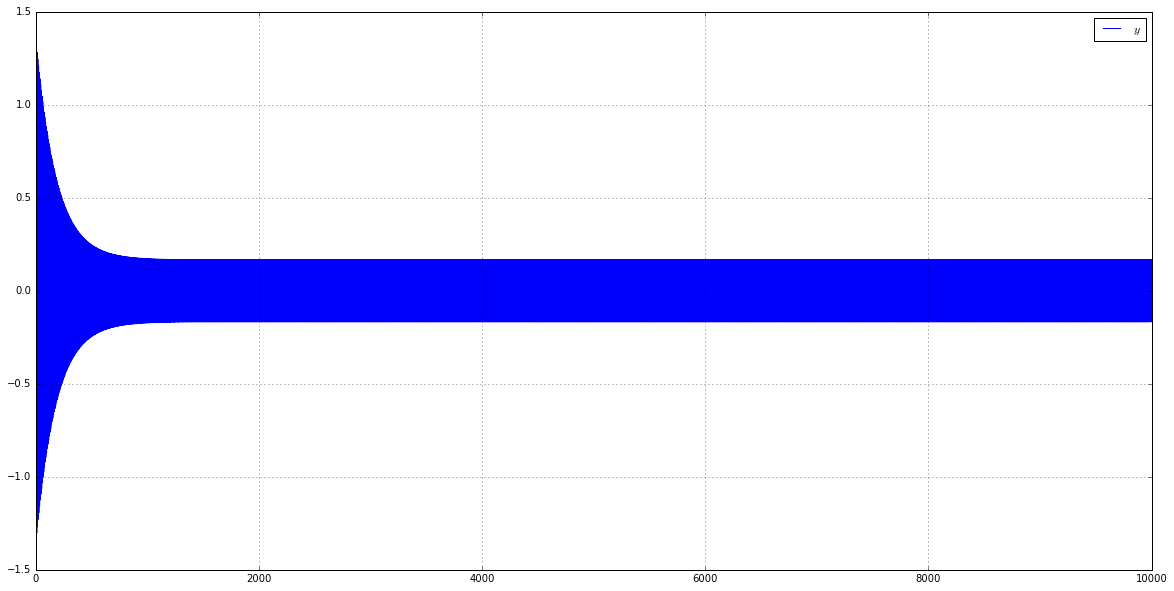

In [12]:
fig, ax = subplots(figsize=(20,10))
t = linspace(0,10000,100000)
ini = array([0.,1.])
sol = odeint(osc,ini,t)
plot(t,sol[:,0],label="$y$")
# plot(t,sol[:,1],label="$v_y$")
grid(True,), legend()
show()

In [4]:
ind = 49
ti, pto_i = t[ind],sol[ind] #tiempo inicial y punto inicial
error = 1e-5
while abs(pto_i[0])>error:
    tip1 = ti - (pto_i[0]/pto_i[1])
    paso = odeint(osc,pto_i,[ti,tip1])
    ti,pto_i = tip1,paso[-1]
print ti,pto_i


6.28331974134 [ -6.84591820e-06   9.58762839e-01]


In [5]:
def root_trayec(func,pto_i,ti,error=1e-5):
    while abs(pto_i[0])>error:
        tip1 = ti - (pto_i[0]/pto_i[1])
        paso = odeint(func,pto_i,[ti,tip1])
        ti,pto_i = tip1,paso[-1]
    return ti,pto_i

In [6]:
ind = 10
ti, pto_i = t[ind],sol[ind]
t_raiz,punto = root_trayec(osc,pto_i,ti)
print t_raiz, punto

-2.31604273337e-08 [ -3.58490473e-11   9.99999833e-01]


In [7]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,2))
j=0
for i in range(len(t)-1):
    if (sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j] = root_trayec(osc,sol[i],t[i])
        j+=1
raices, puntos = raices[0:j],puntos[0:j]

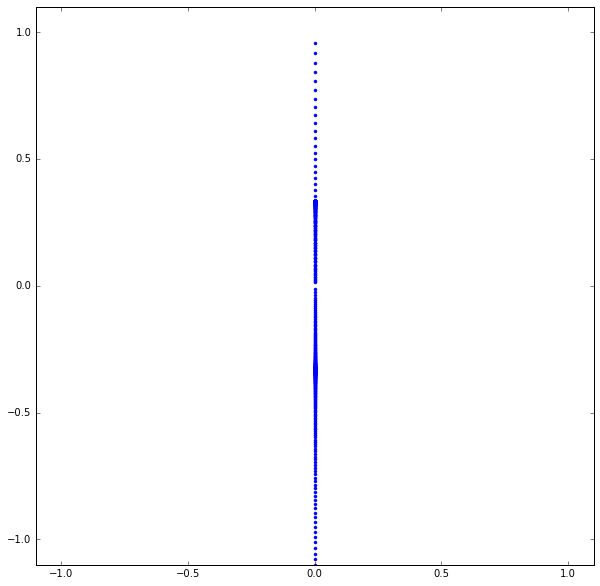

In [27]:
fig, ax = subplots(figsize=(10,10))
xlim([-1.1,1.1]),ylim([-1.1,1.1])
plot(puntos[:,0],puntos[:,1],'.')
show()

#velocidad contra posicion (Espacio Fase)
#Raices

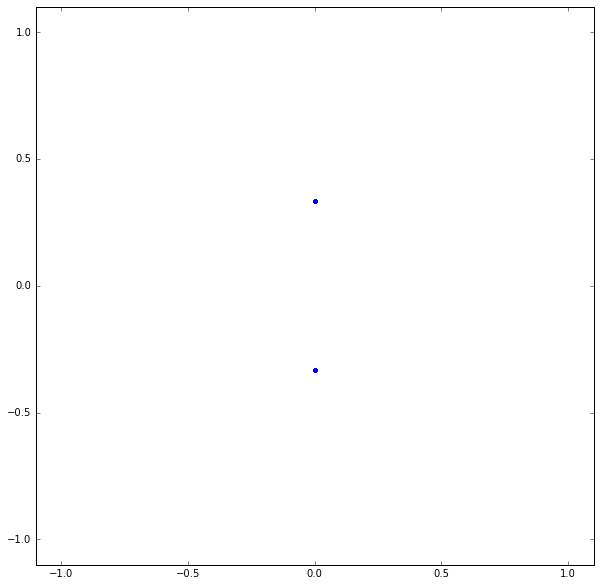

In [24]:
fig, ax = subplots(figsize=(10,10))
xlim([-1.1,1.1]),ylim([-1.1,1.1])
plot(puntos[1000:,0],puntos[1000:,1],'.')
show()

#velocidad contra posicion (Espacio Fase)
#Raices

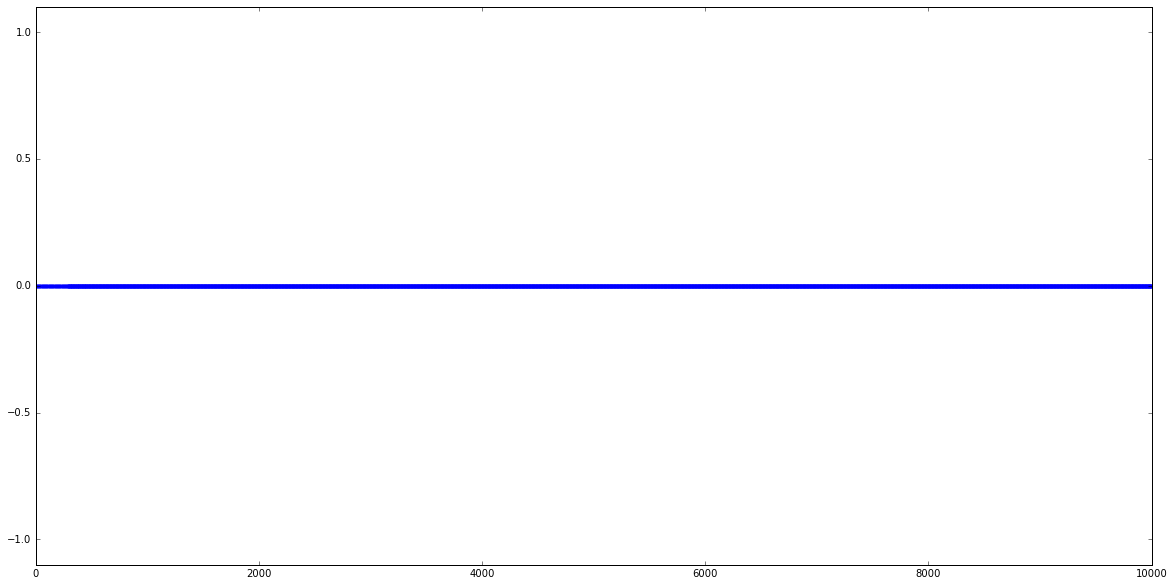

In [25]:
fig, ax = subplots(figsize=(20,10))
ylim([-1.1,1.1])
plot(raices,puntos[:,0],'.')

#trayectoria vs tiempo

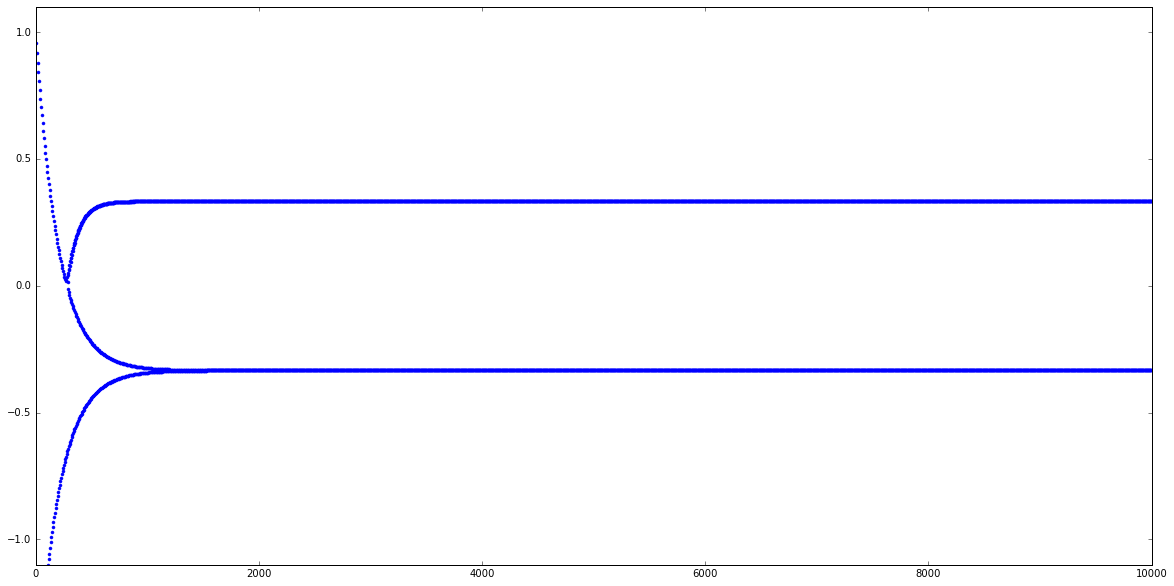

In [26]:
fig, ax = subplots(figsize=(20,10))
ylim([-1.1,1.1])
plot(raices,puntos[:,1],'.')

#trayectoria vs tiempo